# CAP5626 Programming Assignment 2
### Adriel Marie Abad
Scroll down to find deliverables clearly titled.

### Instructions
The submission has both the IPYNB file that can be run anywhere that supports Jupyter notebooks, and a PDF file. Run with the training dataset in the same directory.

The extra credit work is in a separate IPYNB and PDF due to its length.

### Set Up

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from random import random
import copy

In [2]:
# Set random seed
seed()

In [3]:
np.set_printoptions(suppress=True)

In [4]:
# Read csv and convert to numpy
df = pd.read_csv('Credit_N400_p9.csv')

# Make a copy of df
xy = df.copy(deep=True)

# Convert categorical variables to numeric
xy.replace({"Gender": {"Male":0, "Female":1}}, inplace=True)
xy.replace({"Student": {"No":0, "Yes":1}}, inplace=True)
xy.replace({"Married": {"No":0, "Yes":1}}, inplace=True)

print(xy)

      Income  Limit  Rating  Cards  Age  Education  Gender  Student  Married  \
0     14.891   3606     283      2   34         11       0        0        1   
1    106.025   6645     483      3   82         15       1        1        1   
2    104.593   7075     514      4   71         11       0        0        0   
3    148.924   9504     681      3   36         11       1        0        0   
4     55.882   4897     357      2   68         16       0        0        1   
..       ...    ...     ...    ...  ...        ...     ...      ...      ...   
395   12.096   4100     307      3   32         13       0        0        1   
396   13.364   3838     296      5   65         17       0        0        0   
397   57.872   4171     321      5   67         12       1        0        1   
398   37.728   2525     192      1   44         13       0        0        1   
399   18.701   5524     415      5   64          7       1        0        0   

     Balance  
0        333  
1        

In [5]:
# Set the learning rate to 1 x 10^-5
lr = 0.00001

In [6]:
# Convert to numpy array
xy = xy.to_numpy()

# Split into response vector y and design matrix X
y = xy[:,9].reshape(400,1)
X = xy[:,0:9]
          
# Center y
y = y - np.mean(y)

# Center and standardize X
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [7]:
print (X.shape)
print(y.shape)

(400, 9)
(400, 1)


In [8]:
def update_parameters(B,y,X,lb):
    '''
    B is the randomized coefficients
    y is the response vector y, centered
    X is the design matrix X, standardized
    lb is the tuning parameter
    lr is the learning rate
    '''
    for i in range(100000):
        x = lb * B - np.dot(X.T, y - np.dot(X, B))
        B = B - 2 * lr * x
    return B

In [9]:
# Randomly initialize parameter vectors between -1 and 1
B = np.random.uniform(low=-1,high=1,size=(9,1))

### Get coefficients

In [10]:
# Tuning parameter 10^-2

# Randomly initialize parameter vectors between -1 and 1
B0 = copy.deepcopy(B)
B0 = update_parameters(B0,y,X,0.01)
    
print(B0)

[[-274.65377664]
 [ 419.47703894]
 [ 196.0166512 ]
 [  23.44092461]
 [ -10.96516251]
 [  -3.34641882]
 [  -5.200985  ]
 [ 127.78254996]
 [  -3.59623627]]


In [11]:
# Tuning parameter 10^-1

# Randomly initialize parameter vectors between -1 and 1
B1 = copy.deepcopy(B)
B1 = update_parameters(B1,y,X,0.1)

print(B1)

[[-274.34550895]
 [ 412.41444877]
 [ 202.7801551 ]
 [  23.15493787]
 [ -10.99602131]
 [  -3.30586705]
 [  -5.19137093]
 [ 127.70320083]
 [  -3.64811639]]


In [12]:
# Tuning parameter 10^0

# Randomly initialize parameter vectors between -1 and 1
B2 = copy.deepcopy(B)
B2 = update_parameters(B2,y,X,1)

print(B2)

[[-271.23474905]
 [ 367.96632983]
 [ 244.17064444]
 [  21.42467819]
 [ -11.27246691]
 [  -3.03714232]
 [  -5.09422067]
 [ 127.06890144]
 [  -3.98624841]]


In [13]:
# Tuning parameter 10^1

# Randomly initialize parameter vectors between -1 and 1
B3 = copy.deepcopy(B)
B3 = update_parameters(B3,y,X,10)

print(B3)

[[-242.10833392]
 [ 302.25028739]
 [ 280.52528948]
 [  20.27479689]
 [ -13.32129241]
 [  -2.36122776]
 [  -4.18577233]
 [ 123.16827701]
 [  -4.71110792]]


In [14]:
# Tuning parameter 10^2

# Randomly initialize parameter vectors between -1 and 1
B4 = copy.deepcopy(B)
B4 = update_parameters(B4,y,X,100)

print(B4)

[[-94.63942667]
 [211.36544753]
 [209.54614847]
 [ 22.36496179]
 [-19.17568799]
 [ -0.4618808 ]
 [  0.21941357]
 [ 97.66702868]
 [ -5.73202868]]


In [15]:
# Tuning parameter 10^3

# Randomly initialize parameter vectors between -1 and 1
B5 = copy.deepcopy(B)
B5 = update_parameters(B5,y,X,1000)

print(B5)

[[22.93310136]
 [84.07770503]
 [84.21703606]
 [10.26564982]
 [-5.6931724 ]
 [-0.09971875]
 [ 1.99329983]
 [34.00237516]
 [-1.95907508]]


In [16]:
# Tuning parameter 10^4

# Randomly initialize parameter vectors between -1 and 1
B6 = copy.deepcopy(B)
B6 = update_parameters(B6,y,X,10000)

print(B6)

[[ 7.30675542]
 [14.44169723]
 [14.4740176 ]
 [ 1.50156964]
 [-0.12798262]
 [-0.11412644]
 [ 0.36379165]
 [ 4.57395306]
 [-0.13420054]]


## Deliverable 1 - Effect of tuning parameter on inferred regression coefficients

In [17]:
def y_points(index):
    return [B0[index], B1[index], B2[index], B3[index], B4[index], B5[index], B6[index]]

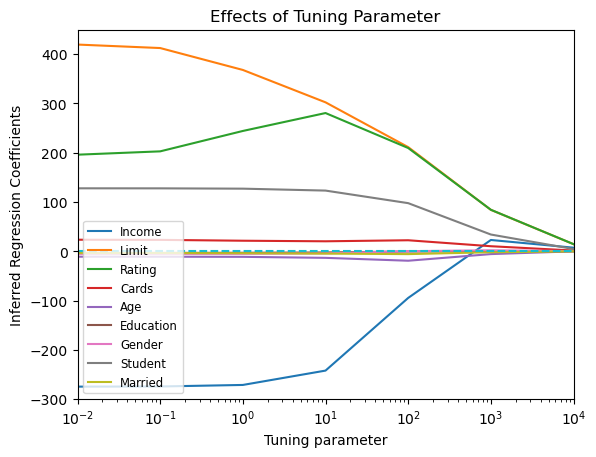

In [18]:
# Plot graphs to illustrate effect of tuning parameters
x_points = [0.01, 0.1, 1, 10, 100, 1000, 10000] # Get x points

y_income = y_points(0)
y_limit = y_points(1)
y_rating = y_points(2)
y_cards = y_points(3)
y_age = y_points(4)
y_education = y_points(5)
y_gender = y_points(6)
y_student = y_points(7)
y_married = y_points(8)

y_zero = np.zeros(7)

plt.plot(x_points, y_income, label="Income")
plt.plot(x_points, y_limit, label="Limit")
plt.plot(x_points, y_rating, label="Rating")
plt.plot(x_points, y_cards, label="Cards")
plt.plot(x_points, y_age, label="Age")
plt.plot(x_points, y_education, label="Education")
plt.plot(x_points, y_gender, label="Gender")
plt.plot(x_points, y_student, label="Student")
plt.plot(x_points, y_married, label="Married")

plt.plot(x_points, y_zero, linestyle="dashed")

plt.title("Effects of Tuning Parameter")
plt.xlabel("Tuning parameter")
plt.ylabel("Inferred Regression Coefficients")
plt.ylim(-300,450)
plt.xlim(0.01,10000)
plt.xscale('log')
plt.legend(loc="lower left", fontsize="small")


### Set up for cross-validation

In [19]:
# Make a copy of df
xy = df.copy(deep=True)

# Convert categorical variables to numeric
xy.replace({"Gender": {"Male":0, "Female":1}}, inplace=True)
xy.replace({"Student": {"No":0, "Yes":1}}, inplace=True)
xy.replace({"Married": {"No":0, "Yes":1}}, inplace=True)

# Convert to numpy array
xy = xy.to_numpy()

# Shuffle dataset, get X and y
np.random.shuffle(xy)
y = xy[:,9].reshape(400,1)
X = xy[:,0:9]

In [20]:
def five_fold_cv(X,y,Bt,lb):
    p = 0 # Lower bound of fold
    fold_size = 80
    mse = [] # List of MSE's for folds
    
    # k-fold cross-validation
    for i in range(5):
        q = p + fold_size # Upper bound of fold

        # Validation set = 80
        X_val = X[p:q]
        y_val = y[p:q]

        # Training set = 320
        X_train = X[np.r_[q:400,0:p]]
        y_train = y[np.r_[q:400,0:p]]

        # Center y_train and y_val
        y_val = y_val - np.mean(y_train)
        y_train = y_train - np.mean(y_train)

        # Center and standardize X_train and X_val
        X_val = (X_val - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
        X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
        
        # Initialize fold B to same random coefficients
        Bf = copy.deepcopy(Bt)

        # Train model
        Bf = update_parameters(Bf,y_train,X_train,lb)

        # Make predictions on validation set and calculate MSE
        y_pred = np.dot(X_val,Bf)
        fold_mse = np.mean((y_val - y_pred)**2)
        mse.append(fold_mse)

        print(f"Fold {i+1} MSE: {fold_mse}")

        # Next fold
        p += fold_size
        
    # Calculate average MSE
    avg_mse = np.sum(mse) / len(mse)
    print("\nAverage MSE:", avg_mse)

    return avg_mse

In [21]:
# Tuning parameter 10^-2
mse0 = five_fold_cv(X,y,B,0.01)

Fold 1 MSE: 14725.341660536476
Fold 2 MSE: 7921.856145202262
Fold 3 MSE: 8389.533094048771
Fold 4 MSE: 7979.461166613303
Fold 5 MSE: 10672.673823940175

Average MSE: 9937.773178068197


In [22]:
# Tuning parameter 10^-1
mse1 = five_fold_cv(X,y,B,0.1)

Fold 1 MSE: 14689.493846362166
Fold 2 MSE: 7923.707070491774
Fold 3 MSE: 8392.059509775767
Fold 4 MSE: 7989.967339086918
Fold 5 MSE: 10691.227224654242

Average MSE: 9937.290998074173


In [23]:
# Tuning parameter 10^0
mse2 = five_fold_cv(X,y,B,1)

Fold 1 MSE: 14423.452256127415
Fold 2 MSE: 7961.848011999333
Fold 3 MSE: 8418.538524504256
Fold 4 MSE: 8087.758475462772
Fold 5 MSE: 10855.390341926648

Average MSE: 9949.397522004085


In [24]:
# Tuning parameter 10^1
mse3 = five_fold_cv(X,y,B,10)

Fold 1 MSE: 13491.926035486811
Fold 2 MSE: 8818.161805891175
Fold 3 MSE: 9025.941319139441
Fold 4 MSE: 9361.639288648736
Fold 5 MSE: 12442.450475353817

Average MSE: 10628.023784903995


In [25]:
# Tuning parameter 10^2
mse4 = five_fold_cv(X,y,B,100)

Fold 1 MSE: 28899.8103480032
Fold 2 MSE: 25912.913684668358
Fold 3 MSE: 26483.317190140988
Fold 4 MSE: 32036.55095919635
Fold 5 MSE: 34806.92218366376

Average MSE: 29627.90287313453


In [26]:
# Tuning parameter 10^3
mse5 = five_fold_cv(X,y,B,1000)

Fold 1 MSE: 118414.2765663052
Fold 2 MSE: 90304.04360008733
Fold 3 MSE: 94637.48123761397
Fold 4 MSE: 107932.55433693784
Fold 5 MSE: 118431.94790916223

Average MSE: 105944.06073002133


In [27]:
# Tuning parameter 10^4
mse6 = five_fold_cv(X,y,B,10000)

Fold 1 MSE: 213349.95403776792
Fold 2 MSE: 158015.00348481536
Fold 3 MSE: 167438.89237389056
Fold 4 MSE: 191223.61339314512
Fold 5 MSE: 218797.96632789314

Average MSE: 189765.0859235024


# Deliverable 2: Effects of Tuning Parameter on CV Error

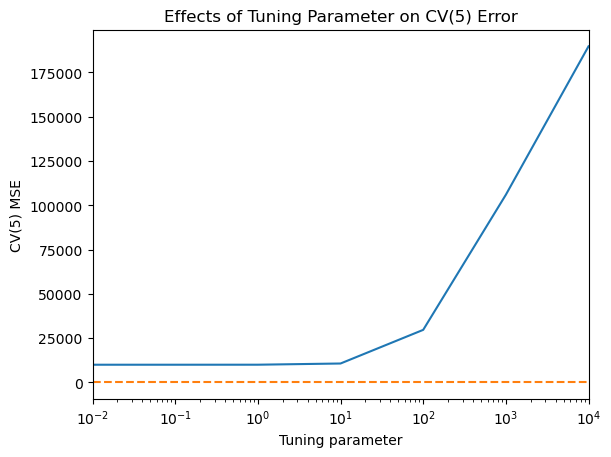

In [28]:
# Plot graphs to illustrate effect of tuning parameters
x_points = [0.01, 0.1, 1, 10, 100, 1000, 10000] # Get x points
y_points = [mse0,mse1,mse2,mse3,mse4,mse5,mse6]


y_zero = np.zeros(7)

plt.plot(x_points, y_points, label="CV(5) Error")

plt.plot(x_points, y_zero, linestyle="dashed")

plt.title("Effects of Tuning Parameter on CV(5) Error")
plt.xlabel("Tuning parameter")
plt.ylabel("CV(5) MSE")
plt.xlim(0.01,10000)
plt.xscale('log')

# Deliverable 3 and 4: Optimal Tuning Parameter

In [30]:
print("Optimal tuning parameter: 10^-1")

# Get X and y
y = xy[:,9].reshape(400,1)
X = xy[:,0:9]

# Center y
y = y - np.mean(y)

# Center and standardize X
X = (X - np.mean(X,axis=0)) / np.std(X,axis=0)

# Train model
Bopt = copy.deepcopy(B)
Bopt = update_parameters(Bopt,y,X,0.1)
    
print("Estimated model parameters:")
print(Bopt)

Optimal tuning parameter: 10^-1
Estimated model parameters:
[[-274.34550895]
 [ 412.41444877]
 [ 202.7801551 ]
 [  23.15493787]
 [ -10.99602131]
 [  -3.30586705]
 [  -5.19137093]
 [ 127.70320083]
 [  -3.64811639]]
